In [52]:
import pandas as pd
from sim_classes import TeamStatGen, TeamProfile, GameManager
from config import game_setup
import matplotlib.pyplot as plt

In [53]:
iterations = 500
fixture = 1035060

In [54]:
team_stats = TeamStatGen(fixture)
home_team = TeamProfile(team_stats.configure_team_stats('home'))
away_team = TeamProfile(team_stats.configure_team_stats('away'))
result_df = pd.DataFrame(columns=['home_score', 'away_score'])

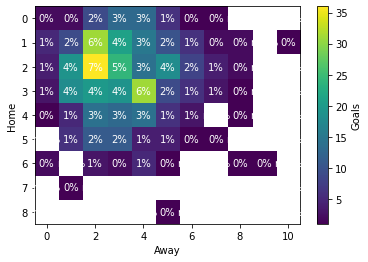

In [55]:
results_df = pd.DataFrame(columns=['home', 'away'])
for i in range(iterations):
    game = GameManager(home_team, away_team, game_setup)
    result_df.loc[len(result_df)] = game.run_game('scores')

pivot_table = result_df.pivot_table(index='home_score', columns='away_score', aggfunc='size')
plt.imshow(pivot_table, cmap='viridis', interpolation='nearest')  # Adjust cmap and interpolation as needed
plt.xlabel('Away')
plt.ylabel('Home')
plt.colorbar(label='Goals')
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, f'{pivot_table.values[i, j] / len(result_df) *100:0.0f}%',
                ha="center", va="center", color="white")


plt.show()
